<a href="https://colab.research.google.com/github/Vidcito/Metodos_Numericos/blob/main/Jacobi_Seidel_ExRecuperacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARTE 1

In [10]:
import numpy as np


# ####################################################################
def gauss_jacobi(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """

    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()
        logging.info(f"i= {k} x: {x.T}")

    return x


# ####################################################################
def gauss_seidel(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()
        logging.info(f"i= {k} x: {x.T}")

    return x

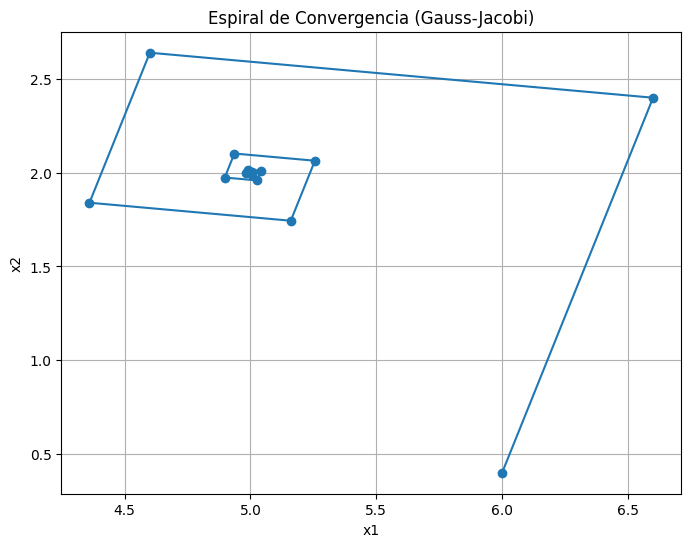

Solución con Gauss-Jacobi: [[5.00000069]
 [2.00000017]]


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del problema
A = np.array([[1, 1], [-2, 5]])
b = np.array([7, 0])
x0 = np.array([1, 1])  # Aproximación inicial
tol = 1e-6
max_iter = 100

# Resolver con Gauss-Jacobi
x_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

# Gráfica de la espiral
x_values = []
y_values = []

x = x0.copy()
for k in range(max_iter):
    x_new = np.zeros(2)
    for i in range(2):
        suma = sum([A[i, j] * x[j] for j in range(2) if j != i])
        x_new[i] = (b[i] - suma) / A[i, i]

    x_values.append(x_new[0])
    y_values.append(x_new[1])

    if np.linalg.norm(x_new - x) < tol:
        break
    x = x_new.copy()

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Espiral de Convergencia (Gauss-Jacobi)")
plt.grid(True)
plt.show()

print("Solución con Gauss-Jacobi:", x_jacobi)


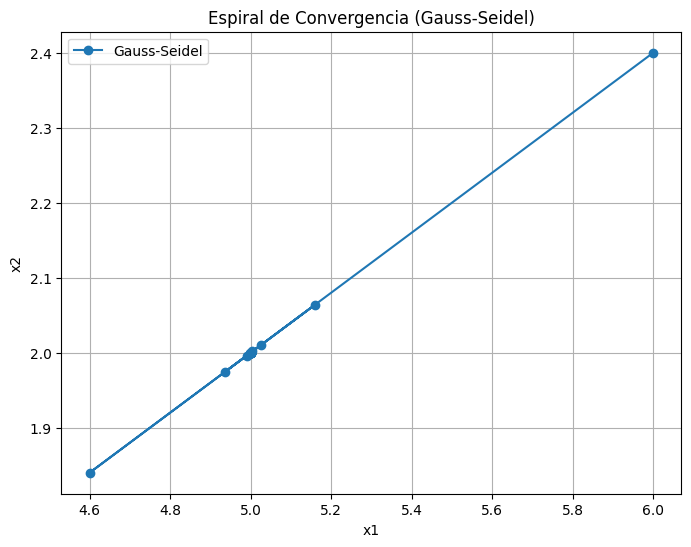

Solución con Gauss-Seidel: [[4.99999983]
 [1.99999993]]


In [34]:
# Datos del problema
A = np.array([[1, 1], [-2, 5]])
b = np.array([7, 0])
x0 = np.array([1, 1])  # Aproximación inicial
tol = 1e-6
max_iter = 100

# Resolver con Gauss-Seidel
x_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

# Gráfica de la espiral para Gauss-Seidel
x_values_seidel = []
y_values_seidel = []

x = x0.copy()
for k in range(max_iter):
    x_new = np.zeros(2)
    for i in range(2):
        suma = sum([A[i, j] * x_new[j] for j in range(i)]) + sum(
            [A[i, j] * x[j] for j in range(i + 1, 2)]
        )
        x_new[i] = (b[i] - suma) / A[i, i]

    x_values_seidel.append(x_new[0])
    y_values_seidel.append(x_new[1])

    if np.linalg.norm(x_new - x) < tol:
        break
    x = x_new.copy()

plt.figure(figsize=(8, 6))
plt.plot(x_values_seidel, y_values_seidel, marker='o', linestyle='-', label='Gauss-Seidel')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Espiral de Convergencia (Gauss-Seidel)")
plt.grid(True)
plt.legend()
plt.show()

print("Solución con Gauss-Seidel:", x_seidel)


#Parte 2

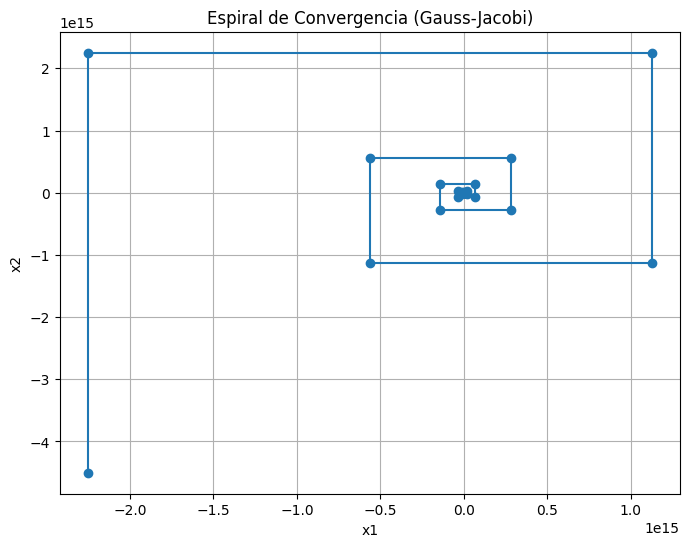

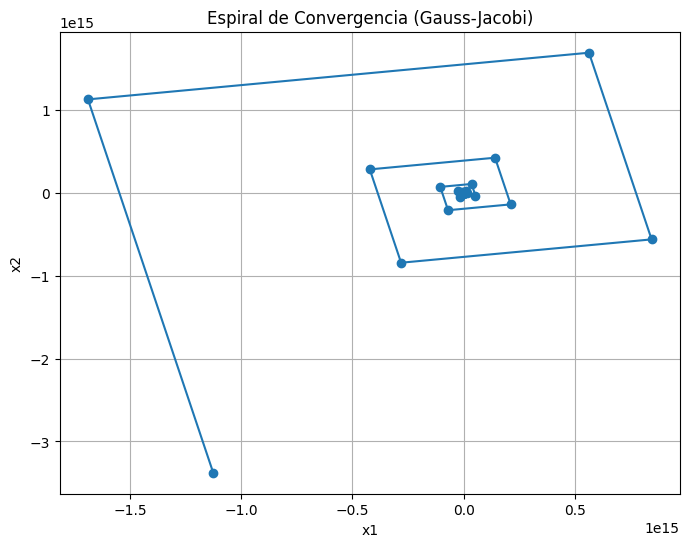

Solución con Gauss-Jacobi: [[-2.25179981e+15]
 [ 2.25179981e+15]]


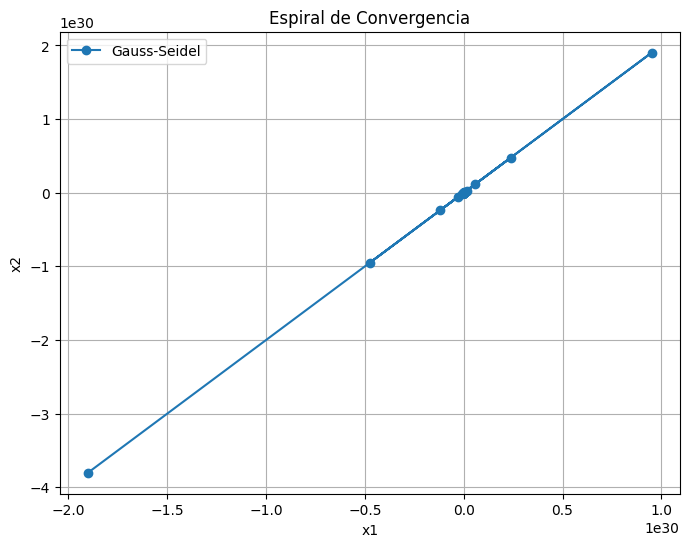

Solución con Gauss-Seidel: [[9.5073795e+29]
 [1.9014759e+30]]


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del problema
A = np.array([[1, 1], [-2, 1]])
b = np.array([6, 0])
x0 = np.array([0, 0])  # Aproximación inicial
tol = 1e-6
max_iter = 100

# Resolver con Gauss-Jacobi
x_jacobi = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

# Gráfica de la espiral
x_values = []
y_values = []

x = x0.copy()
for k in range(max_iter):
    x_new = np.zeros(2)
    for i in range(2):
        suma = sum([A[i, j] * x[j] for j in range(2) if j != i])
        x_new[i] = (b[i] - suma) / A[i, i]

    x_values.append(x_new[0])
    y_values.append(x_new[1])

    if np.linalg.norm(x_new - x) < tol:
        break
    x = x_new.copy()

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Espiral de Convergencia (Gauss-Jacobi)")
plt.grid(True)
plt.show()

x0 = np.array([1, 1])  # Aproximación inicial
# Gráfica de la espiral
x_values = []
y_values = []

x = x0.copy()
for k in range(max_iter):
    x_new = np.zeros(2)
    for i in range(2):
        suma = sum([A[i, j] * x[j] for j in range(2) if j != i])
        x_new[i] = (b[i] - suma) / A[i, i]

    x_values.append(x_new[0])
    y_values.append(x_new[1])

    if np.linalg.norm(x_new - x) < tol:
        break
    x = x_new.copy()

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Espiral de Convergencia (Gauss-Jacobi)")
plt.grid(True)
plt.show()


print("Solución con Gauss-Jacobi:", x_jacobi)


# Resolver con Gauss-Seidel
x_seidel = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter)

# Gráfica de la espiral para Gauss-Seidel
x_values_seidel = []
y_values_seidel = []

x = x0.copy()
for k in range(max_iter):
    x_new = np.zeros(2)
    for i in range(2):
        suma = sum([A[i, j] * x_new[j] for j in range(i)]) + sum(
            [A[i, j] * x[j] for j in range(i + 1, 2)]
        )
        x_new[i] = (b[i] - suma) / A[i, i]

    x_values_seidel.append(x_new[0])
    y_values_seidel.append(x_new[1])

    if np.linalg.norm(x_new - x) < tol:
        break
    x = x_new.copy()

plt.figure(figsize=(8, 6))
plt.plot(x_values_seidel, y_values_seidel, marker='o', linestyle='-', label='Gauss-Seidel')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Espiral de Convergencia")
plt.grid(True)
plt.legend()
plt.show()


print("Solución con Gauss-Seidel:", x_seidel)
